# Matlab and Python

## Similarities

* interpreted, high-level languages
* dynamic variables
* large scientific community

## Differences

* Python is free, Matlab costs from 35€ for students to 2000€ for a standard license plus x for Toolboxes
* Python is open-source, Matlab is proprietary software
* Python is a general purpose language, Matlab is focused on numerics
* Python is modular (various interpreters, IDEs, modules, ...), Matlab is a monolithic program
* Python has namespaces

# Using both Python and Matlab

* From Python you can call Matlab scripts, and from Matlab you can call Python scripts.
* Python can load and save .mat files

Equivalent data structures:
* Matlab **Matrix** is the equivalent to a numpy **array** in Python. 
* Matlab **Struct** is the equivalent to **dict** in Python 
* Matlab **Cell** is the equivalent to **list** in Python (or **object array** in Numpy).

For more detail, see [Numpy for Matlab users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html).

# Example: loading a matrix from a *.mat file and saving a matrix to a *.mat file

Note: Matlab changed its default file format. For old mat-files use scipy. For new mat-files use h5py.

Load modules

In [4]:
import scipy.io       #old
import h5py            #new

import numpy as np
import pylab as pl
%matplotlib inline

Load the *.mat file

In [18]:
#old
data = scipy.io.loadmat('data.mat')

#new
#data = h5py.File('./data.mat', 'r')

list(data.keys())

['signal', 't', '__header__', '__version__', '__globals__']

In [19]:
#old
t = data['t'][:,0]
signal = data['signal'][:,0]

#new
#t=data['t'][0]
#signal=data['signal'][0]

Visualize the data

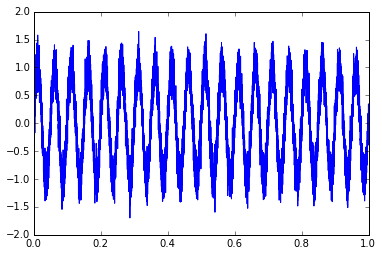

In [20]:

pl.plot(t,signal)

Do something with the data, e.g. filter


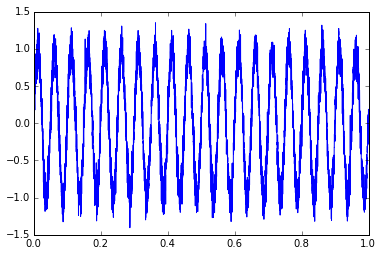

In [21]:
import scipy.signal
signal2 = scipy.signal.medfilt(signal)
pl.plot(t,signal2)

Save the processed data

In [22]:
#old
#scipy.io.savemat('processed_data.mat', {'signal':signal2,'t':t})

#new:
f = h5py.File("processed_data.hdf5", "w")
dset = f.create_dataset('t',data=t)
dset2 = f.create_dataset('signal',data=signal2)
f.close()